In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Statistical Standards


- Robustness(Consistency)
- Effectiveness (Accuracy)

- If neither adjusted R2 or RMSE is close between train and test, we say that the model is not consistent, otherwise the model is consistent;
- Given that the model is consistent, if adjusted rsquare is high, the model is accurate or effective. 

In [59]:
data = pd.read_csv('data/indicepanel.csv',index_col=0)
ReturnPanel=pd.DataFrame()
ReturnPanel['Price']=data['sp500']
ReturnPanel['sp500']=np.log(data['sp500'])-np.log(data['sp500'].shift(1))
ReturnPanel['nikkei']=np.log(data['nikkei'])-np.log(data['nikkei'].shift(1))
ReturnPanel['aord']=np.log(data['aord'])-np.log(data['aord'].shift(1))
ReturnPanel['nyse']=np.log(data['nyse'])-np.log(data['nyse'].shift(1))
ReturnPanel['dax']=np.log(data['dax'])-np.log(data['dax'].shift(1))
ReturnPanel['ftse']=np.log(data['ftse'])-np.log(data['ftse'].shift(1))
ReturnPanel['hangseng']=np.log(data['hangseng'])-np.log(data['hangseng'].shift(1))
ReturnPanel['djia']=np.log(data['djia'])-np.log(data['djia'].shift(1))
ReturnPanel=ReturnPanel.dropna(axis=0)
ReturnPanel.head()


,Price,sp500,nikkei,aord,nyse,dax,ftse,hangseng,djia
2013-09-09,1655.08,0.000000,0.024545,0.006858,0.000000,0.000000,-0.002537,0.005705,0.000000
2013-09-10,1671.71,0.009998,0.015239,0.003758,0.012614,0.005007,0.008121,0.009885,0.008376
2013-09-11,1683.99,0.007319,0.000119,0.006079,0.008432,0.020358,0.000674,-0.001721,0.008458
2013-09-12,1689.13,0.003048,-0.002624,0.001452,0.003597,0.005807,0.000083,0.000723,0.008883
2013-09-13,1683.42,-0.003386,0.001209,-0.004496,-0.004990,-0.000204,-0.000786,-0.001676,-0.001695


In [60]:
dataMatrix=pd.DataFrame()
dataMatrix['Price']=ReturnPanel['Price']
dataMatrix['sp500']=ReturnPanel['sp500']
dataMatrix['sp500_lag']=ReturnPanel['sp500'].shift(1)
dataMatrix['nikkei']=ReturnPanel['nikkei']
dataMatrix['nikkei_lag']=ReturnPanel['nikkei'].shift(1)
dataMatrix['aord']=ReturnPanel['aord']
dataMatrix['aord_lag']=ReturnPanel['aord'].shift(1)
dataMatrix['hangseng']=ReturnPanel['hangseng']
dataMatrix['hangseng_lag']=ReturnPanel['hangseng'].shift(1)
dataMatrix['nyse_lag']=ReturnPanel['nyse'].shift(1)
dataMatrix['dax_lag']=ReturnPanel['dax'].shift(1)
dataMatrix['ftse_lag']=ReturnPanel['ftse'].shift(1)
dataMatrix['djia_lag']=ReturnPanel['djia'].shift(1)
dataMatrix=dataMatrix.dropna(axis=0)
dataMatrix.index=pd.to_datetime(dataMatrix.index)
dataMatrix.head()

,Price,sp500,sp500_lag,nikkei,nikkei_lag,aord,aord_lag,hangseng,hangseng_lag,nyse_lag,dax_lag,ftse_lag,djia_lag
2013-09-10,1671.71,0.009998,0.000000,0.015239,0.024545,0.003758,0.006858,0.009885,0.005705,0.000000,0.000000,-0.002537,0.000000
2013-09-11,1683.99,0.007319,0.009998,0.000119,0.015239,0.006079,0.003758,-0.001721,0.009885,0.012614,0.005007,0.008121,0.008376
2013-09-12,1689.13,0.003048,0.007319,-0.002624,0.000119,0.001452,0.006079,0.000723,-0.001721,0.008432,0.020358,0.000674,0.008458
2013-09-13,1683.42,-0.003386,0.003048,0.001209,-0.002624,-0.004496,0.001452,-0.001676,0.000723,0.003597,0.005807,0.000083,0.008883
2013-09-17,1697.60,0.008388,-0.003386,-0.006477,0.001209,0.005832,-0.004496,0.011508,-0.001676,-0.004990,-0.000204,-0.000786,-0.001695


In [4]:
print(dataMatrix.shape)
Train=dataMatrix.iloc[200:780,:]
Test=dataMatrix.iloc[780:,:]
print(Train.shape,Test.shape)

(974, 13)
(580, 13) (194, 13)


We build our multiple linear regression models with train. 

In [61]:
lm= smf.ols(formula='sp500~nikkei+nikkei_lag+aord+aord_lag+ftse_lag+hangseng+hangseng_lag ', data=Train).fit()

Then we can get our prediction for the train and test

In [62]:
# compute R2 adjusted R2, RMSE
Train_predict=lm.predict(Train)
Test_predict=lm.predict(Test)


Then we compute SST,SSE, SSR

Compute $R^2$,adjusted $R^2$, RMSE


We have the following conclusion
1. The model is robust, $R^2$ remains the same, $RMSE$ even smaller
2. The test data has smaller Adjusted $R^2$ because adjusted $R^2$ punish the fitness measure for small sample size. 

But still, a natural question raises: how large the difference between train and test is , we call they are different ?|

## Compute assess table using methods 

In [19]:
def variation_value(data,model,yname):
    data['yhat']=model.predict(data)
    SST=((data[yname]-data[yname].mean())**2).sum()
    SSR=((data['yhat']-data[yname].mean())**2).sum()
    SSE=((data[yname]-data['yhat'])**2).sum()
    return SST,SSR,SSE

In [20]:
def adjustedMetric(data,model,model_k,yname):
    SST,SSR,SSE=variation_value(data,model,yname)
    r2=SSR/SST
    adjustR2=1-(1-r2)*(data.shape[0]-1)/(data.shape[0]-model_k-1)
    RMSE=(SSE/(data.shape[0]-model_k-1))**0.5
    return adjustR2,RMSE

In [21]:
def assessTable(testdata,traindata,model,model_k,yname):
    r2test,RMSEtest=adjustedMetric(testdata,model,model_k,yname)
    r2train,RMSEtrain=adjustedMetric(traindata,model,model_k,yname)
    assessment=pd.DataFrame(index=['R2','RMSE'],
                        columns=['Train','Test'])
    assessment['Train']=[r2train,RMSEtrain]
    assessment['Test']=[r2test,RMSEtest]
    return assessment
    

In [22]:
assessTable(Test,Train,lm,7,'sp500')

/home/imwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Train,Test
R2,0.250310,0.306202
RMSE,0.008219,0.003842


All these questions are not questions in practice 

## Practical Standards

trade 10 days, overall wealth increase from 1M to 2M
$$1+R=200\%$$
$$(1+r)^{10}=200\%$$

We use model to build trading signal. Performance of  trading based on your signal is the practical standard of your models. 


- Drawdown:the percentage decline in the strategy from the historical peak profit at each point in time. 
- Trades use drawdown to stop loss

- Average Daily return 
  $$
  (1+r)^{days}=1+R
  $$
  where $r$ is average Daily return and $R$ is total return.  


- Sharpe ratio: The ratio measures the excess return (or risk premium) per unit of deviation in an investment asset or a trading strategy, typically referred to as risk, named after William F. Sharpe
$$
SR=\frac{E(R_a-R_b)}{\sqrt{Var(R_a-R_b)}}
$$
Suppose the daily Shape ratio is $SR_{Day}$. Then yearly Shape ratio is 
$$
SR_{Year}=\sqrt{220}SR_{Day}
$$

### Trading strategy


- Benchmark Strategy I: Buy and Hold

- Benchmark Strategy II: Persistent strategy, if last day's return is postive , we buy today, otherwise we short sell 

- Signal-based Strategy: If Signal is postive , we buy, otherwise we short sell. 

### What we trade


 S&P 500 ETF (Exchanged traded fund)- SPY 

# Signal-based Stratgy

In [10]:
Trade_Train=pd.DataFrame()
Trade_Train['Price']=Train['Price']
Trade_Train['Signal']=Train_predict
Trade_Train.head()


,Price,Signal
2014-07-09,1963.71,-0.004444
2014-07-10,1972.83,-0.002017
2014-07-11,1964.68,-0.001045
2014-07-14,1964.68,0.002429
2014-07-15,1977.10,0.003539


In [11]:
Trade_Test=pd.DataFrame()
Trade_Test['Price']=Test['Price']
Trade_Test['Signal']=Test_predict
Trade_Test.head()

,Price,Signal
2016-11-22,2198.18,0.003352
2016-11-24,2204.72,0.004544
2016-11-25,2204.72,0.003104
2016-11-28,2204.72,-0.000277
2016-11-29,2201.72,-0.000763


In [24]:
Trade_Train['Order']=[1 if sig>0 else -1 for sig in Trade_Train['Signal']  ]
Trade_Train['Price_change']=Trade_Train['Price']-Trade_Train['Price'].shift(1)
Trade_Train['Profit']=Trade_Train['Price_change']*Trade_Train['Order']
print(Trade_Train['Profit'].sum())
Trade_Train['Wealth']=Trade_Train['Profit'].cumsum()+Trade_Train['Price'][0]
Trade_Train.head()

3989.610000000002


,Price,Signal,Order,Price_change,Profit,Wealth
2014-07-09,1963.71,-0.004444,-1,NaN,NaN,NaN
2014-07-10,1972.83,-0.002017,-1,9.12,-9.12,1954.59
2014-07-11,1964.68,-0.001045,-1,-8.15,8.15,1962.74
2014-07-14,1964.68,0.002429,1,0.00,0.00,1962.74
2014-07-15,1977.10,0.003539,1,12.42,12.42,1975.16


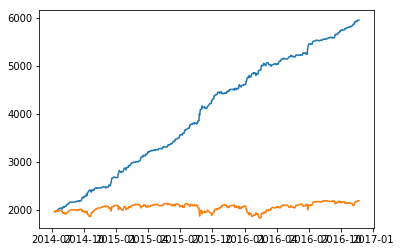

In [25]:
plt.plot(Trade_Train['Wealth'])
plt.plot(Trade_Train['Price'])

In [26]:
Trade_Test['Order']=[1 if sig>0 else -1 for sig in Trade_Test['Signal']  ]
Trade_Test['Price_change']=Trade_Test['Price']-Trade_Test['Price'].shift(1)
Trade_Test['Profit']=Trade_Test['Price_change']*Trade_Test['Order']
print(Trade_Test['Profit'].sum())
Trade_Test['Wealth']=Trade_Test['Profit'].cumsum()+Trade_Test['Price'][0]
Trade_Test.head()

669.3899999999985


,Price,Signal,Order,Price_change,Profit,Wealth,Return,Peak,Drawdown
2016-11-22,2198.18,0.003352,1,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-24,2204.72,0.004544,1,6.54,6.54,2204.72,NaN,2204.72,0.0
2016-11-25,2204.72,0.003104,1,0.00,0.00,2204.72,0.000000,2204.72,0.0
2016-11-28,2204.72,-0.000277,-1,0.00,-0.00,2204.72,0.000000,2204.72,0.0
2016-11-29,2201.72,-0.000763,-1,-3.00,3.00,2207.72,0.001361,2207.72,0.0


669.3899999999985


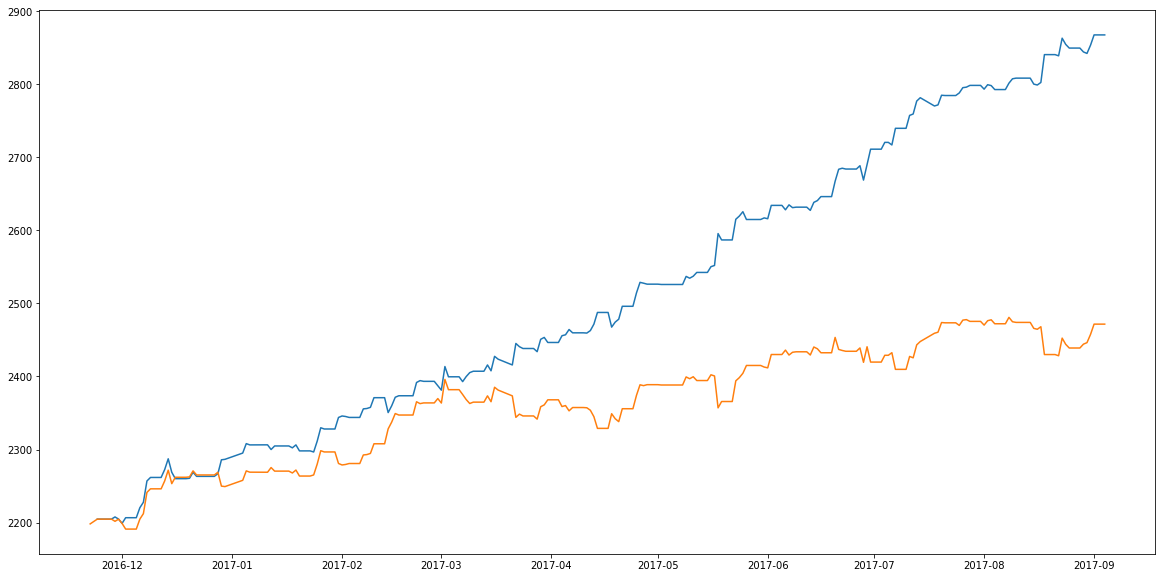

In [15]:
plt.figure(figsize=(20,10))
plt.plot(Trade_Test['Wealth'])
plt.plot(Trade_Test['Price'])
print(Trade_Test['Profit'].sum())

## sharpe ratio

In [27]:
Trade_Train['Return']=(Trade_Train['Wealth']
                      -Trade_Train['Wealth'].shift(1))/Trade_Train['Wealth'].shift(1)
dailyr=Trade_Train['Return'].dropna()
print("daily sharpe ratio is ", dailyr.mean()/dailyr.std(ddof=1))
print("yearly sharpe ratio is", (220**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is  0.3905239545988772
yearly sharpe ratio is 5.792406322541616


In [16]:
Trade_Test.head()
# daily return
Trade_Test['Return']=(Trade_Test['Wealth']
                      -Trade_Test['Wealth'].shift(1))/Trade_Test['Wealth'].shift(1)
dailyr=Trade_Test['Return'].dropna()
print("daily sharpe ratio is ", dailyr.mean()/dailyr.std(ddof=1))
print("yearly sharpe ratio is", (220**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is  0.35527189022345096
yearly sharpe ratio is 5.269533709565548


### Drawdown 

In [29]:
# list comprehension 
Trade_Test['Peak']=[Trade_Test['Wealth'].loc[:any_index].max() 
                    for any_index in Trade_Test.index ]
Trade_Test['Drawdown']=(Trade_Test['Peak']-Trade_Test['Wealth'])/Trade_Test['Peak']

In [33]:
print("Maximum drawdown rate in test is", Trade_Test['Drawdown'].max())
print("Maximum drawdown rate in train is", Trade_Train['Drawdown'].max())

Maximum drawdown rate in test is 0.011887378131421152
Maximum drawdown rate in train is 0.017250046739649576
